In [1]:
import tensorflow as tf

In [2]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.9)

with tf.Session() as sess:
    output = sess.run([node1, node2])
    print(output)

[3.0, 4.9]


In [4]:
multiplication = node1 * node2

File_writer = tf.summary.FileWriter("./graphs/B_multgraph", sess.graph)

with tf.Session() as sess:
    output = sess.run(multiplication)
    print(output)

14.700001


In [5]:
#with place holders

a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

adder = a + b

with tf.Session() as sess:
    output = sess.run(adder, {a: [3.2], b: [5.4]})
    print(output)

[8.6]


In [10]:
#Variable
#As the name suggests it will help to hold the values which will be varying...like updated values for every iteration
#must be initialized explicitly
W = tf.Variable([0.3],tf.float32)
b = tf.Variable([-0.3], tf.float32)
x = tf.placeholder(tf.float32)

linear_model = W*x + b

init = tf.global_variables_initializer()

with tf.Session() as sess:
    #call init to initialize
    sess.run(init)
    output = sess.run(linear_model, {x: [1,3,4,5]})
    print(output)


[0.         0.6        0.90000004 1.2       ]


In [13]:
#Compute the loss function
W = tf.Variable([0.3],tf.float32)
b = tf.Variable([-0.3], tf.float32)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

linear_model = W*x + b
squared_deltas = linear_model - y
loss = tf.reduce_sum(squared_deltas)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    output = sess.run(loss, {x: [1,3,4,5], y: [0., 0.5, 0.9, 1.4]})
    print(output)

-0.099999845


In [17]:
#Optimize weights by reducing the loss using Gradiant Descent optimizer
W = tf.Variable([0.3],tf.float32)
b = tf.Variable([-0.3], tf.float32)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

linear_model = W*x + b
squared_deltas = linear_model - y
loss = tf.reduce_sum(squared_deltas)
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for i in range(100):
        sess.run(train, {x: [1,3,4,5], y: [0., 0.5, 0.9, 1.4]})
    print(sess.run([W,b]))

[array([-12.700009], dtype=float32), array([-4.2999973], dtype=float32)]


In [18]:
#Implement model on data for naval mine identifier dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

def read_dataset():
    df = pd.read_csv("sonar.all-data.csv")
    x = df[df.columns[0:60]].values
    y = df[df.columns[60]]
    
    
    #Encode labels
    #Mainly if R for Rock and M for Mine then this is categorical data..so it will convert them to 0 and 1
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    
    #basically convert them 2 columns with Rock and Mine...so y will be 2 dimensional array
    y = one_hot_encode(y)
    
    print(x.shape)
    return (x,y)


In [19]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [20]:
X, Y = read_dataset()

(207, 60)


In [21]:
X, Y = shuffle(X, Y, random_state=1)

In [22]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=1)

In [24]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(165, 60)
(165, 2)
(42, 60)


In [48]:
#Important Parameters and Variables to work with tensors
learning_rate = 0.3
training_epochs=1000
cost_history = np.empty(shape=[1],dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2
model_path = "./"

n_dim 60


In [27]:
#Number of hidden layers and number of neurons for each layer
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

In [29]:
#Intialize Variables
x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros(n_dim , n_class))
b = tf.Variable(tf.zeros(n_class))
y_ = tf.placeholder(tf.float32, [None, n_class])

In [30]:
#Model Code

def multi_layer_perceptron(x, weights, biases):
    #Hidden Layer with Activation RELU
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    #Hidden Layer 2
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['h2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    #Hidden Layer 3
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['h3'])
    layer_3 = tf.nn.sigmoid(layer_2)
    
    #Hidden Layer 4
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['h4'])
    layer_4 = tf.nn.relu(layer_4)
    
    #output layer with linear activation
    out_layer = tf.matmul(layer_4, weights["out"]) + biases["out"]
    
    return out_layer
    

In [37]:
#Define Weights and Biases for each layer
weights= {
    "h1": tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    "h2": tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    "h3": tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    "h4": tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    "out": tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}

biases = {
    "h1": tf.Variable(tf.truncated_normal([n_hidden_1])),
    "h2": tf.Variable(tf.truncated_normal([n_hidden_2])),
    "h3": tf.Variable(tf.truncated_normal([n_hidden_3])),
    "h4": tf.Variable(tf.truncated_normal([n_hidden_4])),
    "out": tf.Variable(tf.truncated_normal([n_class]))
}

    

In [39]:
#initialize all variables
init = tf.global_variables_initializer()

#Save model
saver = tf.train.Saver()

#Call Model
y = multi_layer_perceptron(x, weights, biases)

#Define Cost Function
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=y_))

#Define the Optimer to reduce the cost function  - Gradiant Descent Optimizer
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

Epoch: 0 - Cost: 106.3905029296875 - MSE: 15434.874809829285 - Accuracy: 0.5636363625526428
Epoch: 1 - Cost: 1.1051934957504272 - MSE: 4.161720205765633 - Accuracy: 0.4363636374473572
Epoch: 2 - Cost: 0.7442381381988525 - MSE: 3.737308954666735 - Accuracy: 0.5636363625526428
Epoch: 3 - Cost: 0.7345606684684753 - MSE: 2.0803230304840326 - Accuracy: 0.4363636374473572
Epoch: 4 - Cost: 0.681256890296936 - MSE: 2.812456713301256 - Accuracy: 0.5636363625526428
Epoch: 5 - Cost: 0.677985668182373 - MSE: 2.438979390099807 - Accuracy: 0.5636363625526428
Epoch: 6 - Cost: 0.6745338439941406 - MSE: 2.7263163677024744 - Accuracy: 0.5636363625526428
Epoch: 7 - Cost: 0.6726968884468079 - MSE: 2.5606355858299166 - Accuracy: 0.5575757622718811
Epoch: 8 - Cost: 0.67125403881073 - MSE: 2.7135320185034186 - Accuracy: 0.5636363625526428
Epoch: 9 - Cost: 0.6700586676597595 - MSE: 2.6145162642887585 - Accuracy: 0.5757575631141663
Epoch: 10 - Cost: 0.6688682436943054 - MSE: 2.7287464588458272 - Accuracy: 0.55

Epoch: 89 - Cost: 0.6546149253845215 - MSE: 2.139658702471606 - Accuracy: 0.5939394235610962
Epoch: 90 - Cost: 0.6294559836387634 - MSE: 4.527888401641171 - Accuracy: 0.581818163394928
Epoch: 91 - Cost: 0.6526471972465515 - MSE: 2.145213817145861 - Accuracy: 0.5878787636756897
Epoch: 92 - Cost: 0.6287261247634888 - MSE: 4.556100168911143 - Accuracy: 0.5878787636756897
Epoch: 93 - Cost: 0.6525452136993408 - MSE: 2.0869542824418454 - Accuracy: 0.5878787636756897
Epoch: 94 - Cost: 0.6300153136253357 - MSE: 4.51069803773381 - Accuracy: 0.581818163394928
Epoch: 95 - Cost: 0.6545085310935974 - MSE: 2.049504034077449 - Accuracy: 0.5878787636756897
Epoch: 96 - Cost: 0.629270613193512 - MSE: 4.481631276226627 - Accuracy: 0.581818163394928
Epoch: 97 - Cost: 0.6583125591278076 - MSE: 2.010606600602601 - Accuracy: 0.5757575631141663
Epoch: 98 - Cost: 0.6296910643577576 - MSE: 4.481379020589125 - Accuracy: 0.581818163394928
Epoch: 99 - Cost: 0.6549559831619263 - MSE: 1.9834439311715066 - Accuracy: 

Epoch: 177 - Cost: 0.546552836894989 - MSE: 1.2465676669096117 - Accuracy: 0.7939394116401672
Epoch: 178 - Cost: 0.5457426309585571 - MSE: 1.806864621922462 - Accuracy: 0.6545454263687134
Epoch: 179 - Cost: 0.607276976108551 - MSE: 0.9228153669041352 - Accuracy: 0.6484848260879517
Epoch: 180 - Cost: 0.5961471796035767 - MSE: 2.480665174926515 - Accuracy: 0.6303030252456665
Epoch: 181 - Cost: 0.7582525610923767 - MSE: 0.8826065975078925 - Accuracy: 0.4484848380088806
Epoch: 182 - Cost: 0.5634258985519409 - MSE: 2.5549914279192825 - Accuracy: 0.7090908885002136
Epoch: 183 - Cost: 0.5375354290008545 - MSE: 2.1404142805654414 - Accuracy: 0.7090908885002136
Epoch: 184 - Cost: 0.528688907623291 - MSE: 1.4144342933951737 - Accuracy: 0.7757575511932373
Epoch: 185 - Cost: 0.5223225951194763 - MSE: 1.694277159242582 - Accuracy: 0.6909090876579285
Epoch: 186 - Cost: 0.55648273229599 - MSE: 0.9767041114429929 - Accuracy: 0.7333333492279053
Epoch: 187 - Cost: 0.646970272064209 - MSE: 2.403499079862

Epoch: 264 - Cost: 0.5842742919921875 - MSE: 0.8541425927852702 - Accuracy: 0.678787887096405
Epoch: 265 - Cost: 0.6262766718864441 - MSE: 2.7368770741781843 - Accuracy: 0.6303030252456665
Epoch: 266 - Cost: 0.7854751944541931 - MSE: 0.7594481018911078 - Accuracy: 0.4484848380088806
Epoch: 267 - Cost: 0.6027435660362244 - MSE: 1.870275110925466 - Accuracy: 0.7333333492279053
Epoch: 268 - Cost: 0.5623566508293152 - MSE: 3.07087577513928 - Accuracy: 0.6969696879386902
Epoch: 269 - Cost: 0.509320080280304 - MSE: 2.0143040329019475 - Accuracy: 0.7818182110786438
Epoch: 270 - Cost: 0.4840794801712036 - MSE: 1.7390717690535378 - Accuracy: 0.739393949508667
Epoch: 271 - Cost: 0.47753262519836426 - MSE: 0.9930764380022801 - Accuracy: 0.800000011920929
Epoch: 272 - Cost: 0.5170921683311462 - MSE: 1.8353234916414756 - Accuracy: 0.6909090876579285
Epoch: 273 - Cost: 0.7872247099876404 - MSE: 0.8426573556494623 - Accuracy: 0.4727272689342499
Epoch: 274 - Cost: 0.6258016228675842 - MSE: 3.449732076

Epoch: 351 - Cost: 0.7641231417655945 - MSE: 4.435422654641872 - Accuracy: 0.6181818246841431
Epoch: 352 - Cost: 0.9153696894645691 - MSE: 0.7936121895562926 - Accuracy: 0.4363636374473572
Epoch: 353 - Cost: 0.6379968523979187 - MSE: 0.9370720568130809 - Accuracy: 0.6181818246841431
Epoch: 354 - Cost: 0.5221202373504639 - MSE: 1.273718822429635 - Accuracy: 0.7636363506317139
Epoch: 355 - Cost: 0.5115159153938293 - MSE: 1.531737749794521 - Accuracy: 0.7333333492279053
Epoch: 356 - Cost: 0.5050123333930969 - MSE: 1.4630438630932483 - Accuracy: 0.7878788113594055
Epoch: 357 - Cost: 0.5010191202163696 - MSE: 1.7494254701273295 - Accuracy: 0.7151514887809753
Epoch: 358 - Cost: 0.5296090245246887 - MSE: 1.223061642853376 - Accuracy: 0.7939394116401672
Epoch: 359 - Cost: 0.528549313545227 - MSE: 2.8618694901707094 - Accuracy: 0.6909090876579285
Epoch: 360 - Cost: 0.6482759714126587 - MSE: 1.0753880510898053 - Accuracy: 0.581818163394928
Epoch: 361 - Cost: 0.5191820859909058 - MSE: 4.172716198

Epoch: 438 - Cost: 0.4948061406612396 - MSE: 2.5912927972811732 - Accuracy: 0.7515151500701904
Epoch: 439 - Cost: 0.4747970700263977 - MSE: 1.8350301229177892 - Accuracy: 0.8060606122016907
Epoch: 440 - Cost: 0.45943909883499146 - MSE: 2.651807955504878 - Accuracy: 0.7636363506317139
Epoch: 441 - Cost: 0.47376200556755066 - MSE: 1.476669484439801 - Accuracy: 0.8121212124824524
Epoch: 442 - Cost: 0.5959489345550537 - MSE: 4.238438643213276 - Accuracy: 0.6727272868156433
Epoch: 443 - Cost: 1.011556625366211 - MSE: 1.1439558118681616 - Accuracy: 0.4363636374473572
Epoch: 444 - Cost: 0.5438666343688965 - MSE: 2.3541540014913687 - Accuracy: 0.7272727489471436
Epoch: 445 - Cost: 0.5279513597488403 - MSE: 2.220016973243226 - Accuracy: 0.7454545497894287
Epoch: 446 - Cost: 0.5149286985397339 - MSE: 2.191303501039839 - Accuracy: 0.7515151500701904
Epoch: 447 - Cost: 0.5001671314239502 - MSE: 1.979164672311004 - Accuracy: 0.7636363506317139
Epoch: 448 - Cost: 0.48122742772102356 - MSE: 1.9860027

Epoch: 525 - Cost: 0.4958426356315613 - MSE: 1.7218196365965 - Accuracy: 0.7454545497894287
Epoch: 526 - Cost: 0.47522324323654175 - MSE: 1.2784519338246185 - Accuracy: 0.7878788113594055
Epoch: 527 - Cost: 0.44682377576828003 - MSE: 1.719941297933835 - Accuracy: 0.7575757503509521
Epoch: 528 - Cost: 0.4316413104534149 - MSE: 1.351151935348246 - Accuracy: 0.8545454740524292
Epoch: 529 - Cost: 0.4473908841609955 - MSE: 2.2753393937069513 - Accuracy: 0.7272727489471436
Epoch: 530 - Cost: 0.5872995257377625 - MSE: 1.3243691485153979 - Accuracy: 0.6121212244033813
Epoch: 531 - Cost: 0.8113992214202881 - MSE: 7.29369313140341 - Accuracy: 0.6060606241226196
Epoch: 532 - Cost: 0.658026397228241 - MSE: 0.7750938415410025 - Accuracy: 0.5333333611488342
Epoch: 533 - Cost: 0.5530983209609985 - MSE: 1.6880692454006483 - Accuracy: 0.7939394116401672
Epoch: 534 - Cost: 0.5001723766326904 - MSE: 2.7745368635913685 - Accuracy: 0.7636363506317139
Epoch: 535 - Cost: 0.47440943121910095 - MSE: 2.47775582

Epoch: 612 - Cost: 0.414943128824234 - MSE: 3.072255471168908 - Accuracy: 0.7939394116401672
Epoch: 613 - Cost: 0.5115216374397278 - MSE: 1.768877401090099 - Accuracy: 0.7151514887809753
Epoch: 614 - Cost: 0.9859375953674316 - MSE: 8.899885399181235 - Accuracy: 0.581818163394928
Epoch: 615 - Cost: 0.9084827899932861 - MSE: 1.0986273589780025 - Accuracy: 0.4484848380088806
Epoch: 616 - Cost: 0.6526815891265869 - MSE: 1.0152996784998027 - Accuracy: 0.6545454263687134
Epoch: 617 - Cost: 0.5912008881568909 - MSE: 1.471083090996878 - Accuracy: 0.842424213886261
Epoch: 618 - Cost: 0.5449813604354858 - MSE: 3.4833860975409565 - Accuracy: 0.7090908885002136
Epoch: 619 - Cost: 0.5164275765419006 - MSE: 2.2824254657161003 - Accuracy: 0.7878788113594055
Epoch: 620 - Cost: 0.48405492305755615 - MSE: 2.8365121391243884 - Accuracy: 0.7757575511932373
Epoch: 621 - Cost: 0.4583317041397095 - MSE: 2.5002233244352587 - Accuracy: 0.8303030133247375
Epoch: 622 - Cost: 0.44978418946266174 - MSE: 3.59688021

Epoch: 699 - Cost: 0.45785361528396606 - MSE: 2.7517656535126207 - Accuracy: 0.7636363506317139
Epoch: 700 - Cost: 0.7497516870498657 - MSE: 7.748182778308751 - Accuracy: 0.6727272868156433
Epoch: 701 - Cost: 0.8561559319496155 - MSE: 1.9234243467895595 - Accuracy: 0.539393961429596
Epoch: 702 - Cost: 0.6085308790206909 - MSE: 5.430086299899086 - Accuracy: 0.5757575631141663
Epoch: 703 - Cost: 0.5444244742393494 - MSE: 2.013363235634019 - Accuracy: 0.6545454263687134
Epoch: 704 - Cost: 0.5100681185722351 - MSE: 2.6675354100965065 - Accuracy: 0.7151514887809753
Epoch: 705 - Cost: 0.4799899160861969 - MSE: 2.2223536451203136 - Accuracy: 0.7696969509124756
Epoch: 706 - Cost: 0.44561195373535156 - MSE: 2.400092790566803 - Accuracy: 0.800000011920929
Epoch: 707 - Cost: 0.41499850153923035 - MSE: 2.109750182566715 - Accuracy: 0.8363636136054993
Epoch: 708 - Cost: 0.3936571180820465 - MSE: 2.8343340485291306 - Accuracy: 0.800000011920929
Epoch: 709 - Cost: 0.38255465030670166 - MSE: 2.5696443

Epoch: 786 - Cost: 0.3437279760837555 - MSE: 3.7574527132898488 - Accuracy: 0.8545454740524292
Epoch: 787 - Cost: 0.3416677415370941 - MSE: 3.6069996975103567 - Accuracy: 0.8848484754562378
Epoch: 788 - Cost: 0.35290542244911194 - MSE: 4.366393639070611 - Accuracy: 0.8303030133247375
Epoch: 789 - Cost: 0.43710723519325256 - MSE: 3.121557409072821 - Accuracy: 0.7878788113594055
Epoch: 790 - Cost: 0.8427971005439758 - MSE: 9.424744479835113 - Accuracy: 0.6727272868156433
Epoch: 791 - Cost: 0.8657442927360535 - MSE: 1.9382488756642884 - Accuracy: 0.521212100982666
Epoch: 792 - Cost: 0.5219424366950989 - MSE: 2.8730849822689937 - Accuracy: 0.678787887096405
Epoch: 793 - Cost: 0.4995775520801544 - MSE: 3.136978174901517 - Accuracy: 0.7454545497894287
Epoch: 794 - Cost: 0.4771147668361664 - MSE: 2.670638966606668 - Accuracy: 0.8060606122016907
Epoch: 795 - Cost: 0.45100706815719604 - MSE: 2.7262029434365296 - Accuracy: 0.7939394116401672
Epoch: 796 - Cost: 0.426513671875 - MSE: 2.30953614945

Epoch: 873 - Cost: 0.38847416639328003 - MSE: 3.3086801811458275 - Accuracy: 0.8181818127632141
Epoch: 874 - Cost: 0.36966896057128906 - MSE: 2.7720371948861824 - Accuracy: 0.8545454740524292
Epoch: 875 - Cost: 0.3556678891181946 - MSE: 3.3001848090927917 - Accuracy: 0.842424213886261
Epoch: 876 - Cost: 0.3435152769088745 - MSE: 2.633351732770093 - Accuracy: 0.8727272748947144
Epoch: 877 - Cost: 0.3409104347229004 - MSE: 4.01113374640447 - Accuracy: 0.8181818127632141
Epoch: 878 - Cost: 0.3938736915588379 - MSE: 2.6252676704814926 - Accuracy: 0.842424213886261
Epoch: 879 - Cost: 0.5777949690818787 - MSE: 6.9019735897075645 - Accuracy: 0.7272727489471436
Epoch: 880 - Cost: 0.8002374768257141 - MSE: 2.166038260863484 - Accuracy: 0.5454545617103577
Epoch: 881 - Cost: 0.48773545026779175 - MSE: 4.770969351264246 - Accuracy: 0.7272727489471436
Epoch: 882 - Cost: 0.44700196385383606 - MSE: 2.1726886401915273 - Accuracy: 0.8848484754562378
Epoch: 883 - Cost: 0.40768417716026306 - MSE: 3.50781

Epoch: 960 - Cost: 0.33933213353157043 - MSE: 6.583379177784228 - Accuracy: 0.8242424130439758
Epoch: 961 - Cost: 0.4653681516647339 - MSE: 4.318285524801569 - Accuracy: 0.7696969509124756
Epoch: 962 - Cost: 0.8171004056930542 - MSE: 12.105995882492724 - Accuracy: 0.6848484873771667
Epoch: 963 - Cost: 0.5165835022926331 - MSE: 2.0998352662062776 - Accuracy: 0.7212121486663818
Epoch: 964 - Cost: 0.42339104413986206 - MSE: 4.467263083101139 - Accuracy: 0.7757575511932373
Epoch: 965 - Cost: 0.36409786343574524 - MSE: 3.777959648947194 - Accuracy: 0.8545454740524292
Epoch: 966 - Cost: 0.32502055168151855 - MSE: 4.238816678634081 - Accuracy: 0.8969696760177612
Epoch: 967 - Cost: 0.31228911876678467 - MSE: 5.3082632471775195 - Accuracy: 0.8606060743331909
Epoch: 968 - Cost: 0.320639967918396 - MSE: 4.716514341137663 - Accuracy: 0.8909090757369995
Epoch: 969 - Cost: 0.390519380569458 - MSE: 7.11686634800085 - Accuracy: 0.7757575511932373
Epoch: 970 - Cost: 0.6362011432647705 - MSE: 3.93896847

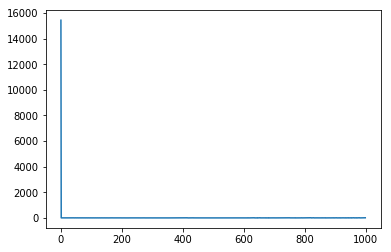

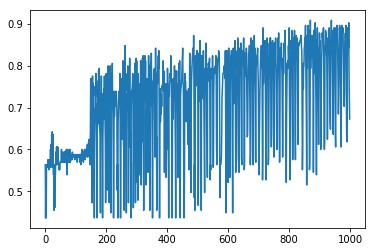

Final Accuracy: 0.6190476417541504
MSE: 11.446640702363513


In [49]:
# Execute the model
mse_history = []
accuracy_history = []
    
#use "with" command to open sess because you dont need to close sess afterwards
with tf.Session() as sess:
    sess.run(init)
    
    #Run Multiple Epochs
    for epoch in range(training_epochs):
        sess.run(training_step, feed_dict={x: train_x, y_: train_y})
        cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
        cost_history = np.append(cost_history, cost)
        correct_prediction = tf.equal(tf.arg_max(y,1), tf.arg_max(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
        pred_y = sess.run(y, feed_dict={x:test_x})
        mse = tf.reduce_mean(tf.square(pred_y-test_y))
        mse_ = sess.run(mse)
        mse_history.append(mse_)
        
        accuracy = (sess.run(accuracy, feed_dict = {x: train_x, y_: train_y}))
        accuracy_history.append(accuracy)
        
        print("Epoch: {} - Cost: {} - MSE: {} - Accuracy: {}".format(epoch, cost, mse_, accuracy))
    
    save_path = saver.save(sess, model_path)
    print("Model Saved here: {}".format(save_path))
    
    plt.plot(mse_history)
    plt.show()
    plt.plot(accuracy_history)
    plt.show()

    #Print the final Accuracy 
    correct_prediction = tf.equal(tf.arg_max(y,1), tf.arg_max(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Final Accuracy: {}".format(sess.run(accuracy, feed_dict= {x: test_x, y_: test_y})))
    
    #Print the Final MSE
    pred_y = sess.run(y, feed_dict={x:test_x})
    mse = tf.reduce_mean(tf.square(pred_y-test_y))
    mse_ = sess.run(mse)
    print("MSE: {}".format(mse_))
    

In [47]:
#To load the model use saver object
with tf.Session() as sess:
    saver.restore(sess, model_path)

INFO:tensorflow:Restoring parameters from ./
